In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline
from random import shuffle

In [8]:
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def adult_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0,probability=True)
    
    print(Y_train.dtypes)
    Y_train=Y_train.astype('int')
    print(Y_train.dtypes)
    
    print(Y_test.dtypes)
    Y_test=Y_test.astype('int')
    print(Y_test.dtypes)
    
    
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
        
    e=svm.predict_proba(X_test)
    print(e)
    return X_test,Y_test_pred,Y_test,e
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
# without accuracy
import time
# import pulp as p 
# from random import *

# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult_train = pd.read_csv('data/adult_actual/adult_train_data.csv', header=None, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_train = adult_train.drop('fnlwgt', axis=1)

# Read in test data
adult_test = pd.read_csv('data/adult_actual/adult_test_data.csv', header=None, skiprows=1, names=columns, skipinitialspace=True)

# Drop the fnlwgt column which is useless for later analysis
adult_test = adult_test.drop('fnlwgt', axis=1)

# Remove '.' in income column
adult_test['income'] = adult_test['income'].apply(lambda x: '>50k' if x=='>50k.'  else '<=50k')


# Convert '?' to NaNs and remove the entries with NaN value
# Check missing value code and convert to NaNs
object_col = adult_train.select_dtypes(include=object).columns.tolist()
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Show the results of the split
# print("After removing the missing value:")
# print("Training set has {} samples.".format(adult_train.shape[0]))
# print("Testing set has {} samples.".format(adult_test.shape[0]))
for col in object_col:
    print(adult_train[col].value_counts(dropna=False)/adult_train.shape[0],'\n')
# print(adult_train.head())
# print(adult_test.head())    

adult_train.reset_index(drop=True, inplace=True)
adult_test.reset_index(drop=True, inplace=True)
p=adult_train.shape[0]
q =adult_test.shape[0]
# reducing dimensionality of some very sparse features
for i in range(0,p):
    if adult_train.loc[i,'native-country'] not in ["united-states"] :
               adult_train.loc[i,"native-country"] = "non-united-stated"        
    if adult_train.loc[i,"education"] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_train.loc[i,"education"] = "prim-middle-school"
    elif adult_train.loc[i,"education"] in ["9th", "10th", "11th", "12th"]:
               adult_train.loc[i,"education"] = "high-school"   
    if adult_train.loc[i,'income'] in [">50k"] :
               adult_train.loc[i,"income"] = 1 
    else: 
               adult_train.loc[i,"income"] = 0         
#reducing dimensionality of some very sparse features
for i in range(0,q):                
    if adult_test.loc[i,'native-country'] not in ["united-states"]:
               adult_test.loc[i,'native-country'] = "non-united-stated"
    if adult_test.loc[i,'education'] in ["Preschool", "1st-4th", "5th-6th", "7th-8th"]:
               adult_test.loc[i,'education'] = "prim-middle-school"
    elif adult_test.loc[i,'education'] in ["9th", "10th", "11th", "12th"]:
               adult_test.loc[i,'education'] = "high-school"   
    if adult_test.loc[i,'income'] in [">50k",">50k."] :
               adult_test.loc[i,"income"] = 1 
    else: 
               adult_test.loc[i,"income"] = 0            
# print(adult_train.head())
# print(adult_test.head())
DATA=pd.concat([adult_train,adult_test],ignore_index=True)
# print(DATA.tail())
m=DATA.shape[1]

dat=DATA.iloc[:,0:m-1]


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
num_col = dat.dtypes[dat.dtypes != 'object'].index
features_log_minmax_transform = pd.DataFrame(data = dat)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_minmax_transform[num_col])

display(features_log_minmax_transform.head())

# sens=DATA[['sex','race']]

Data_c = pd.get_dummies(features_log_minmax_transform, columns=['sex','race','workclass','education','marital-status','occupation','relationship','native-country'], prefix =['s','r','work','edu','ms','occ','rls','nc'])
r=DATA.iloc[:,m-1]
print(Data_c)
print(DATA['income'].value_counts())
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'


X_test,Y_test_pred,Y_test,e = adult_svm(Data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)

# print(X_test)
# print(Y_test_pred)
# print(Y_test)
sens=X_test[['s_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo','r_other']]
# print(sens)

    


     
# for i in range(0,p):  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
 
            

# print(sens.head())
sensitive = sens.T

# print(sensitive)







#accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)


# 

private             0.738877
self-emp-not-inc    0.082853
local-gov           0.068530
state-gov           0.042404
self-emp-inc        0.035608
federal-gov         0.031265
without-pay         0.000464
Name: workclass, dtype: float64 

hs-grad         0.326238
some-college    0.221404
bachelors       0.167230
masters         0.053942
assoc-voc       0.043333
11th            0.034746
assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
prof-school     0.017970
9th             0.015085
12th            0.012499
doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
preschool       0.001492
Name: education, dtype: float64 

married-civ-spouse       0.466315
never-married            0.322459
divorced                 0.139712
separated                0.031132
widowed                  0.027419
married-spouse-absent    0.012267
married-af-spouse        0.000696
Name: marital-status, dtype: float64 

prof-specialty       0.133877
craft-repair         0

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,state-gov,bachelors,0.800000,never-married,adm-clerical,not-in-family,white,male,0.02174,0.0,0.397959,united-states
1,0.452055,self-emp-not-inc,bachelors,0.800000,married-civ-spouse,exec-managerial,husband,white,male,0.00000,0.0,0.122449,united-states
2,0.287671,private,hs-grad,0.533333,divorced,handlers-cleaners,not-in-family,white,male,0.00000,0.0,0.397959,united-states
3,0.493151,private,high-school,0.400000,married-civ-spouse,handlers-cleaners,husband,black,male,0.00000,0.0,0.397959,united-states
4,0.150685,private,bachelors,0.800000,married-civ-spouse,prof-specialty,wife,black,female,0.00000,0.0,0.397959,non-united-stated


            age  education-num  capital-gain  capital-loss  hours-per-week  \
0      0.301370       0.800000      0.021740           0.0        0.397959   
1      0.452055       0.800000      0.000000           0.0        0.122449   
2      0.287671       0.533333      0.000000           0.0        0.397959   
3      0.493151       0.400000      0.000000           0.0        0.397959   
4      0.150685       0.800000      0.000000           0.0        0.397959   
...         ...            ...           ...           ...             ...   
45216  0.219178       0.800000      0.000000           0.0        0.397959   
45217  0.301370       0.800000      0.000000           0.0        0.357143   
45218  0.287671       0.800000      0.000000           0.0        0.500000   
45219  0.369863       0.800000      0.054551           0.0        0.397959   
45220  0.246575       0.800000      0.000000           0.0        0.602041   

       s_female  s_male  r_amer-indian-eskimo  r_asian-pac-isla

In [14]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
######################
    delta=1

    epsilon=[.01]
    beta_converge = [.1248,.1646]
    #beta_converge = [.15]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 
    t=0
  
    gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                # no weighting basic weighting 1
                u1,u2=min_sum_lpca_g(data,gamma,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg",a,beta_avg)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                print("<--------------------------------------->")
                t=t+1
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
          

    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [15]:
#basic weighting 1

####################3LP5#######################3
#NG
import time
import pulp as p 
def min_sum_lpca_g(data1,beta,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)

        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h5[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
    '''            
    
    for j in range(len(key1)):    
        if h1[j]==h1[j-1] and j>=1:
            data2[0][key1[j]]=data2[0][key1[j-1]]
        else:    
            data2[0][key1[j]]=j+1
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    '''
    
    alpha2=[1,1,1,1,1,1,1]
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha2[5]
    for j in range(len(key7)):
        if data1[6][key7[j]]==1 and data1[0][key7[j]]==1:                    
            data2[6][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha2[5]
        else:                    
             data2[6][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha2[5]            
                
    
    for j in range(n):
        summ=0
        for i in range(m):
       
            summ=summ+data2[i][j] 
        cost[j]=summ
        
        
    ################
    
    
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    beta_actual = [0.2591466724568451, 0.07300275482093664, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.034782608695652174]    
        
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  

    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
    
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    

    for i in range(m):
        print(p.value(Y[i])) 
    for i in range(m):
        print(p.value(X[i]))    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [77]:
#the final values
import numpy as np
accu=[0.8470,0.8460,0.8424,0.8384,0.8337,0.8264]
0.06956521739130435
acc_rate=[[0.2591466724568451, 0.07323232323232323, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.043478260869565216],
[0.24025621539463685, 0.09182736455463728, 0.20106182565507794, 0.10491803278688525, 0.27970297029702973, 0.11333333333333333, 0.06086956521739131],
[0.2213657583324286, 0.10996326905417815, 0.191984928926186, 0.11967213114754098, 0.25, 0.12666666666666668, 0.08695652173913043],
[0.2024753012702204, 0.1283287419651056, 0.18282240109607809, 0.13524590163934427, 0.22277227722772278, 0.14, 0.11304347826086956],
[0.18358484420801216, 0.14646464646464646, 0.17374550436718617, 0.15, 0.19306930693069307, 0.15333333333333332, 0.1391304347826087],
[0.16469438714580392, 0.16483011937557393, 0.16466860763829422, 0.16475409836065574, 0.16584158415841585, 0.16666666666666666, 0.16521739130434782]]

prec=[[0.7235023041474654, 0.6865203761755486, 0.732681336593317, 0.7064220183486238, 0.49193548387096775, 0.42857142857142855, 0.8],
[0.7397198373248983, 0.6425, 0.7385008517887564, 0.6953125, 0.5132743362831859, 0.47058823529411764, 0.7142857142857143],
[0.7538008827856792, 0.5949895615866388, 0.7421944692239072, 0.6232876712328768, 0.504950495049505, 0.42105263157894735, 0.8],
[0.7694369973190348, 0.5599284436493739, 0.7437939110070257, 0.5878787878787879, 0.5, 0.38095238095238093, 0.7692307692307693],
[0.79183914843288, 0.5172413793103449, 0.7461803844258256, 0.5409836065573771, 0.47435897435897434, 0.34782608695652173, 0.6875],
[0.8101516150296638, 0.4777158774373259, 0.7389495579823193, 0.4975124378109453, 0.47761194029850745, 0.32, 0.5789473684210527]]


rec=[[0.6176680972818311, 0.46794871794871795, 0.6103190767141887, 0.47530864197530864, 0.48412698412698413, 0.4, 0.26666666666666666],
     [0.5854792560801144, 0.5491452991452992, 0.5885947046843177, 0.5493827160493827, 0.4603174603174603, 0.5333333333333333, 0.3333333333333333],
[0.5497138769670958, 0.6089743589743589, 0.5648336727766463, 0.5617283950617284, 0.40476190476190477, 0.5333333333333333, 0.5333333333333333],
[0.5132331902718169, 0.6688034188034188, 0.5390359809911744, 0.5987654320987654, 0.35714285714285715, 0.5333333333333333, 0.6666666666666666],
[0.478898426323319, 0.7051282051282052, 0.5139171758316361, 0.6111111111111112, 0.29365079365079366, 0.5333333333333333, 0.7333333333333333],
[0.4395565092989986, 0.7329059829059829, 0.4823489477257298, 0.6172839506172839, 0.25396825396825395, 0.5333333333333333, 0.7333333333333333]]

#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)

[[0.2591 0.2403 0.2214 0.2025 0.1836 0.1647]
 [0.0732 0.0918 0.11   0.1283 0.1465 0.1648]
 [0.2101 0.2011 0.192  0.1828 0.1737 0.1647]
 [0.0893 0.1049 0.1197 0.1352 0.15   0.1648]
 [0.3069 0.2797 0.25   0.2228 0.1931 0.1658]
 [0.0933 0.1133 0.1267 0.14   0.1533 0.1667]
 [0.0435 0.0609 0.087  0.113  0.1391 0.1652]]
[0.7241428783038055, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] [0.4637780902689879, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063] [0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264] [0.2634524321997417, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]


In [78]:

#->2356
weight_prec=[0.7241428783038055, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414]
weight_rec=[0.4637780902689879, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063]
weight_acc=[0.8468, 0.846, 0.8424, 0.8384, 0.8337, 0.8264]

weight_prec_nocv=[0.7316750708413238, 0.7271169257831477, 0.7219846093071025, 0.7161041640956282, 0.7102390064027229, 0.7039721196974439] 
weight_rec_nocv=[0.5012282595458991, 0.5034664249981261, 0.5066655307291422, 0.5090618386286936, 0.512927559757441, 0.5167819323500434]
weight_acc_nocv=[0.8517, 0.8405, 0.8289, 0.8167, 0.8059, 0.7945]


dp=[0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]

In [16]:
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e)
#4agar

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
9211
2796
0.30355010313755293
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
4356
468
0.10743801652892562
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
11678
2946
0.252269224182223
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
1220
162
0.13278688524590163
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
404
126
0.3118811881188119
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
150
15
0.1
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
115
15
0.13043478260869565
data acceptance rates
[0.30355010313755293, 0.10743801652892562, 0.252269224182223, 0.13278688524590163, 0.3118811881188119, 0.1, 0.13043478260869565]
data DP
0.21188118811881188
sensitive attribute  1
prec reca accuracy for each sens
0.7297863426895685 0.623032904148784 0.815546629030507
SVM----------tota

[ 9211  4356 11678  1220   404   150   115]
None
None
None
None
None
None
None
Optimal
objective is:
5554548.0
discripency is:
None
alpha, beta_avg 0 0.1646
<--------------------------------------->
iteration t 7
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
sensitive attribute  7
individual acceptance rates
[0.2591466724568451, 0.07392102846648302, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.06956521739130435]
individul precision
[0.7235023041474654, 0.6894409937888198, 0.732681336593317, 0.7064220183486238, 0.5, 0.42857142857142855, 0.75]
individual recall
[0.6176680972818311, 0.47435897435897434, 0.6103190767141887, 0.47530864197530864, 0.49206349206349204, 0.4, 0.4]
DP all
0.2373654756780026
precision all 0.719453672942045
recall all 0.5971200980392157
accuracy all 0.8470553549052848
TP,FP,TN,FN
1949 760 9543 1315
dimension of data
7 13567
[ 9211  435

In [18]:
# this is for demo LP5 used in figure
import numpy as np
accu=[0.8470,0.8460,0.8424,0.8384,0.8337,0.8264]

acc_rate=[[0.2591466724568451, 0.07392102846648302, 0.21013872238396986, 0.08934426229508197, 0.3069306930693069, 0.09333333333333334, 0.06956521739130435],
[0.24025621539463685, 0.09182736455463728, 0.20106182565507794, 0.10491803278688525, 0.27970297029702973, 0.11333333333333333, 0.06086956521739131],
[0.2213657583324286, 0.10996326905417815, 0.191984928926186, 0.11967213114754098, 0.25, 0.12666666666666668, 0.08695652173913043],
[0.2024753012702204, 0.1283287419651056, 0.18282240109607809, 0.13524590163934427, 0.22277227722772278, 0.14, 0.11304347826086956],
[0.18358484420801216, 0.14646464646464646, 0.17374550436718617, 0.15, 0.19306930693069307, 0.15333333333333332, 0.1391304347826087],
[0.16469438714580392, 0.16483011937557393, 0.16466860763829422, 0.16475409836065574, 0.16584158415841585, 0.16666666666666666, 0.16521739130434782]]

prec=[[0.7235023041474654, 0.6894409937888198, 0.732681336593317, 0.7064220183486238, 0.5, 0.42857142857142855, 0.75],
[0.7397198373248983, 0.6425, 0.7385008517887564, 0.6953125, 0.5132743362831859, 0.47058823529411764, 0.7142857142857143],
[0.7538008827856792, 0.5949895615866388, 0.7421944692239072, 0.6232876712328768, 0.504950495049505, 0.42105263157894735, 0.8],
[0.7694369973190348, 0.5599284436493739, 0.7437939110070257, 0.5878787878787879, 0.5, 0.38095238095238093, 0.7692307692307693],
[0.79183914843288, 0.5172413793103449, 0.7461803844258256, 0.5409836065573771, 0.47435897435897434, 0.34782608695652173, 0.6875],
[0.8101516150296638, 0.4777158774373259, 0.7389495579823193, 0.4975124378109453, 0.47761194029850745, 0.32, 0.5789473684210527]]


rec=[[0.6176680972818311, 0.47435897435897434, 0.6103190767141887, 0.47530864197530864, 0.49206349206349204, 0.4, 0.4],
[0.5854792560801144, 0.5491452991452992, 0.5885947046843177, 0.5493827160493827, 0.4603174603174603, 0.5333333333333333, 0.3333333333333333],
[0.5497138769670958, 0.6089743589743589, 0.5648336727766463, 0.5617283950617284, 0.40476190476190477, 0.5333333333333333, 0.5333333333333333],
[0.5132331902718169, 0.6688034188034188, 0.5390359809911744, 0.5987654320987654, 0.35714285714285715, 0.5333333333333333, 0.6666666666666666],
[0.478898426323319, 0.7051282051282052, 0.5139171758316361, 0.6111111111111112, 0.29365079365079366, 0.5333333333333333, 0.7333333333333333],
[0.4395565092989986, 0.7329059829059829, 0.4823489477257298, 0.6172839506172839, 0.25396825396825395, 0.5333333333333333, 0.7333333333333333]]

#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
print(np.transpose(acc_rate))

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)

[[0.2591 0.2403 0.2214 0.2025 0.1836 0.1647]
 [0.0739 0.0918 0.11   0.1283 0.1465 0.1648]
 [0.2101 0.2011 0.192  0.1828 0.1737 0.1647]
 [0.0893 0.1049 0.1197 0.1352 0.15   0.1648]
 [0.3069 0.2797 0.25   0.2228 0.1931 0.1658]
 [0.0933 0.1133 0.1267 0.14   0.1533 0.1667]
 [0.0696 0.0609 0.087  0.113  0.1391 0.1652]]
[0.7242958893645358, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] [0.47118374174243605, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063] [0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264] [0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]


In [19]:
#final result for LP% adult at .1654
#->2356
weight_prec=[0.7242958893645358, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] 
weight_rec=[0.47118374174243605, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063]
weight_acc=[0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264]

weight_prec_nocv=[0.7316750708413238, 0.7271169257831477, 0.7219846093071025, 0.7161041640956282, 0.7102390064027229, 0.7039721196974439] 
weight_rec_nocv=[0.5012282595458991, 0.5034664249981261, 0.5066655307291422, 0.5090618386286936, 0.512927559757441, 0.5167819323500434]
weight_acc_nocv=[0.8517, 0.8405, 0.8289, 0.8167, 0.8059, 0.7945]


dp=[0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]





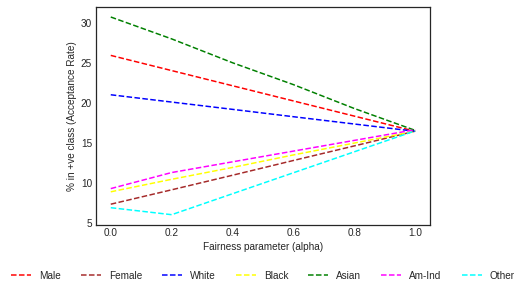

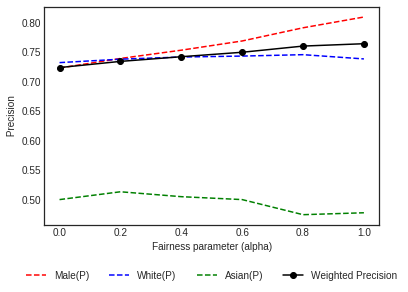

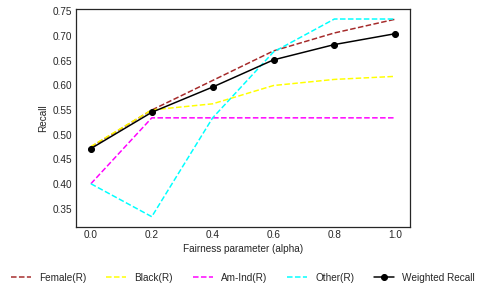

No handles with labels found to put in legend.


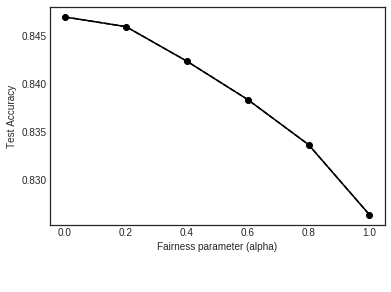

In [20]:
####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# delta1=[.8], gama=[.15], epsilon=[.01]
import matplotlib.pyplot as plt
import numpy as np
alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
#acceptance_rate=np.transpose(acc_rate) 
a=[acc_rate[i][0]*100 for i in range(6)]  
b=[acc_rate[i][1]*100 for i in range(6)]  
c=[acc_rate[i][2]*100 for i in range(6)]  
d=[acc_rate[i][3]*100 for i in range(6)]   
e=[acc_rate[i][4]*100 for i in range(6)]  
f=[acc_rate[i][5]*100 for i in range(6)]   
g=[acc_rate[i][6]*100 for i in range(6)] 


  # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='Male',color='red',linestyle='--') 
ax.plot(alpha,b,label='Female',color='brown',linestyle='--')  
ax.plot(alpha,c,label='White',color='blue',linestyle='--') 
ax.plot(alpha,d,label='Black',color='yellow',linestyle='--')
ax.plot(alpha,e,label='Asian',color='green',linestyle='--') 
ax.plot(alpha,f,label='Am-Ind',color='magenta',linestyle='--')
ax.plot(alpha,g,label='Other',color='cyan',linestyle='--')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 




import os

fig.savefig('a1.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

a=[prec[i][0] for i in range(6)]  

c=[prec[i][2] for i in range(6)]  
 
e=[prec[i][4] for i in range(6)]  
x=[weight_prec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='Male(P)',color='red',linestyle='--') 
 
ax.plot(alpha,c,label='White(P)',color='blue',linestyle='--') 

ax.plot(alpha,e,label='Asian(P)',color='green',linestyle='--') 
ax.plot(alpha,x,label='Weighted Precision',color='black',marker='o',linestyle='-')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel(' Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png')




#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.


b=[rec[i][1] for i in range(6)]  
 
d=[rec[i][3] for i in range(6)]   
 
f=[rec[i][5] for i in range(6)]   
g=[rec[i][6] for i in range(6)] 
y=[weight_rec[i] for i in range(6)]  
'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)


ax.plot(alpha,b,label='Female(R)',color='brown',linestyle='--')  
ax.plot(alpha,d,label='Black(R)',color='yellow',linestyle='--')
ax.plot(alpha,f,label='Am-Ind(R)',color='magenta',linestyle='--')
ax.plot(alpha,g,label='Other(R)',color='cyan',linestyle='--')
ax.plot(alpha,y,label='Weighted Recall',color='black',marker='o',linestyle='-')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

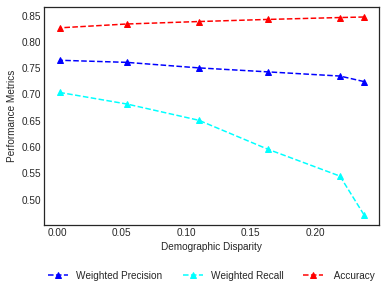

In [1]:
#This is the above results with DP variations
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')

weight_prec=[0.7242958893645358, 0.7347548584345627, 0.7427138939057756, 0.7502610940236546, 0.7607742427643391, 0.7647919357552414] 
weight_rec=[0.47118374174243605, 0.54453983393092, 0.5956744192776836, 0.6506536870629777, 0.6816345403916027, 0.7036394820450063]
weight_acc=[0.847, 0.846, 0.8424, 0.8384, 0.8337, 0.8264]

dp=[0.2373654756780026, 0.21883340507963842, 0.16304347826086957, 0.10972879896685321, 0.05393887214808438, 0.0019980590283724398]
  




fig = plt.figure()
ax = plt.subplot(111)
'''
ax.plot(dp,y1,label='Weighted Precision',color='blue',marker='^',linestyle='-')  
ax.plot(dp,y2,label='Weighted Recall',color='cyan',marker='^',linestyle='-')
ax.plot(dp,y3,label=' Accuracy',color='red',marker='^',linestyle='-')
'''
ax.plot(dp,weight_prec,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(dp,weight_rec,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(dp,weight_acc,label=' Accuracy',color='red',marker='^',linestyle='--')

   
plt.title('')
ax.set_xlabel('Demographic Disparity')
ax.set_ylabel('Performance Metrics') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 




In [35]:
#second  diagram for beta variation from .1 to .2 in adult dp==0(LP4)

prec=[[0.8816, 0.5701, 0.8508, 0.3442, 0.425, 0.1875, 0.4545],
[0.8669, 0.5344, 0.8322, 0.2876, 0.4285, 0.1666, 0.3846],
 [0.8432, 0.4975, 0.8004, 0.2764, 0.4736, 0.1428, 0.3125],
[0.8153, 0.4669, 0.7682, 0.2666, 0.4687, 0.1666, 0.2777],
[0.7911, 0.4375, 0.7397, 0.2557, 0.4520, 0.1481, 0.3],
[0.7725, 0.4087, 0.7147, 0.2418, 0.5061, 0.1333, 0.2608]]

      
rec=[[0.2904, 0.5299, 0.3370, 0.2592, 0.1349, 0.2, 0.3333],
[0.3426, 0.5961, 0.3957, 0.2592, 0.1666, 0.2, 0.3333],
 [0.3887, 0.6474, 0.4439, 0.2901, 0.2142, 0.2, 0.3333],    
[0.4295, 0.6944, 0.4871, 0.3209, 0.2380, 0.2666, 0.3333],
[0.4688, 0.7329, 0.5278, 0.3456, 0.2619, 0.2666, 0.4],
[0.5089, 0.7606, 0.5665, 0.3641, 0.3253, 0.2666, 0.4] ]  

accu=[0.8157,8218,0.8244,0.8245,0.8233,0.8216]

# this is for demo LP5 used in figure
import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
#print(np.transpose(acc_rate))

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        #acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu)

[0.8560447095289533, 0.8395510966045181, 0.8127140750481379, 0.7828921570469168, 0.7564761517869723, 0.7357454797351243] [0.4610165896250642, 0.5103860811504879, 0.5550977401129943, 0.598292056154768, 0.6334761855846601, 0.6579978770758432] [0.8157, 8218, 0.8244, 0.8245, 0.8233, 0.8216]


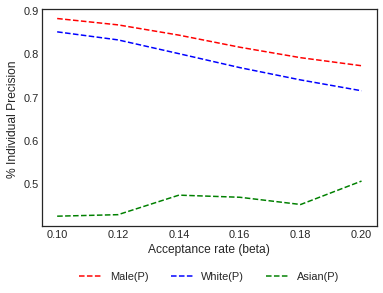

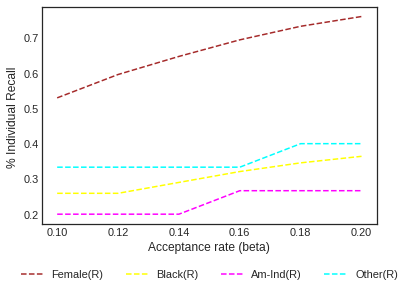

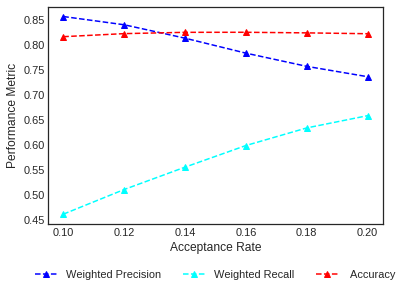

In [54]:
#1FIG
#beta (.1 to .2 for adult case)
prec=[[0.8816, 0.5701, 0.8508, 0.3442, 0.425, 0.1875, 0.4545],
[0.8669, 0.5344, 0.8322, 0.2876, 0.4285, 0.1666, 0.3846],
 [0.8432, 0.4975, 0.8004, 0.2764, 0.4736, 0.1428, 0.3125],
[0.8153, 0.4669, 0.7682, 0.2666, 0.4687, 0.1666, 0.2777],
[0.7911, 0.4375, 0.7397, 0.2557, 0.4520, 0.1481, 0.3],
[0.7725, 0.4087, 0.7147, 0.2418, 0.5061, 0.1333, 0.2608]]

      
rec=[[0.2904, 0.5299, 0.3370, 0.2592, 0.1349, 0.2, 0.3333],
[0.3426, 0.5961, 0.3957, 0.2592, 0.1666, 0.2, 0.3333],
 [0.3887, 0.6474, 0.4439, 0.2901, 0.2142, 0.2, 0.3333],    
[0.4295, 0.6944, 0.4871, 0.3209, 0.2380, 0.2666, 0.3333],
[0.4688, 0.7329, 0.5278, 0.3456, 0.2619, 0.2666, 0.4],
[0.5089, 0.7606, 0.5665, 0.3641, 0.3253, 0.2666, 0.4] ] 

weighted_precision=[0.8560, 0.8395, 0.8127, 0.7828, 0.7564, 0.7357] 
weighted_recall=[0.4610, 0.5103, 0.5550, 0.5982, 0.6334, 0.6579] 
accu=[0.8157, 8218, 0.8244, 0.8245, 0.8233, 0.8216]

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
beta=[.1,.12,.14,.16,.18,.2]
a=[prec[i][0] for i in range(6)]  
#b=[rec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(6)]  
#d=[rec[i][3] for i in range(6)]   
e=[prec[i][4] for i in range(6)]  
#f=[rec[i][5] for i in range(6)]   
#g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,a,label='Male(P)',color='red',linestyle='--') 
 
ax.plot(beta,c,label='White(P)',color='blue',linestyle='--') 

ax.plot(beta,e,label='Asian(P)',color='green',linestyle='--') 


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

#a=[prec[i][0] for i in range(6)]  
b=[rec[i][1] for i in range(6)]  
#c=[prec[i][2] for i in range(6)]  
d=[rec[i][3] for i in range(6)]   
#e=[prec[i][4] for i in range(6)]  
f=[rec[i][5] for i in range(6)]   
g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,b,label='Female(R)',color='brown',linestyle='--')  
ax.plot(beta,d,label='Black(R)',color='yellow',linestyle='--')
ax.plot(beta,f,label='Am-Ind(R)',color='magenta',linestyle='--')
ax.plot(beta,g,label='Other(R)',color='cyan',linestyle='--')


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Recall ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 


#This is the above results with DP variations
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''
beta=[.1,.12,.14,.16,.18,.2]
weighted_precision=[0.8560, 0.8395, 0.8127, 0.7828, 0.7564, 0.7357] 
weighted_recall=[0.4610, 0.5103, 0.5550, 0.5982, 0.6334, 0.6579] 
accu=[0.8157, .8218, 0.8244, 0.8245, 0.8233, 0.8216]

average=[.1992,.1992,.1992,.1992,.1992,.1992,.1992]
one=[.4,0.5,.6,.7,.8,.9,1]

fig = plt.figure()
ax = plt.subplot(111)


ax.plot(beta,weighted_precision,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(beta,weighted_recall,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(beta,accu,label=' Accuracy',color='red',marker='^',linestyle='--')

   
plt.title('')
ax.set_xlabel('Acceptance Rate')
ax.set_ylabel('Performance Metric') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 






[0.9861255173910268, 0.9833452974169584, 0.9201594830408341, 0.8800877429684798, 0.8649721496778335, 0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338, 0.7088373578021177, 0.6911815585527588, 0.662548583436653, 0.6387937697925845, 0.5891832428635603] [0.1474807306571274, 0.17236849314689867, 0.28827785638833975, 0.39530658363050075, 0.4221153053544768, 0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613, 0.6945014716515031, 0.7127109945691238, 0.7301724571027772, 0.7394293182114903, 0.7712821228201016] [0.7774, 0.7813, 0.7954, 0.8088, 0.8117, 0.8157, 0.82442, 0.8245, 0.8216, 0.8184, 0.8146, 0.8054, 0.7954, 0.7699]


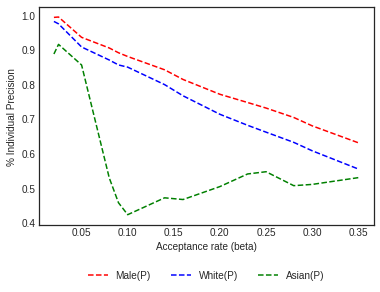

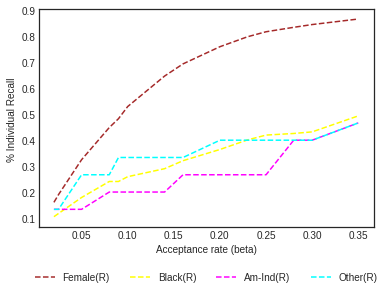

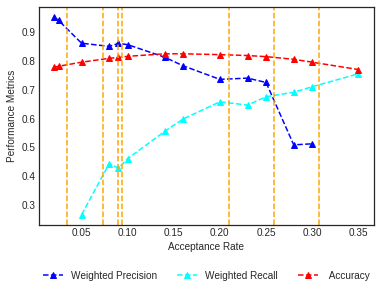

In [10]:
#2FIG-->practice
#beta (.1 to .2 for adult case)
prec=[[0.9945652173913043, 0.8620689655172413, 0.9828326180257511, 0.7083333333333334, 0.8888888888888888, 0.6666666666666666, 1.0],
[0.9956521739130435, 0.8240740740740741, 0.9759450171821306, 0.6333333333333333, 0.9166666666666666, 0.6666666666666666, 1.0],
[0.9369565217391305, 0.7004608294930875, 0.9090909090909091, 0.47540983606557374, 0.8571428571428571, 0.2857142857142857, 0.8],
[0.90625, 0.603448275862069, 0.8715203426124197, 0.4020618556701031, 0.53125, 0.25, 0.4444444444444444],
 [0.892512077294686, 0.576530612244898, 0.857278782112274, 0.3577981651376147, 0.4594594594594595, 0.23076923076923078, 0.5],

      [0.8816503800217155, 0.5701149425287356, 0.8508997429305912, 0.3442622950819672, 0.425, 0.1875, 0.45454545454545453],
[0.843289371605896, 0.4975369458128079, 0.8004895960832313, 0.27647058823529413, 0.47368421052631576, 0.14285714285714285, 0.3125],
[0.8153428377460964, 0.46695402298850575, 0.7682012847965739, 0.26666666666666666, 0.46875, 0.16666666666666666, 0.2777777777777778],
[0.7725298588490771, 0.4087256027554535, 0.7147751605995717, 0.24180327868852458, 0.5061728395061729, 0.13333333333333333, 0.2608695652173913],
[0.7488196411709159, 0.37362637362637363, 0.6830540037243947, 0.23214285714285715, 0.5425531914893617, 0.11764705882352941, 0.23076923076923078],

      [0.7328410078192876, 0.3516988062442608, 0.6632408359027064, 0.22295081967213115, 0.5490196078431373, 0.10810810810810811, 0.21428571428571427],
[0.7056998836758434, 0.32075471698113206, 0.6338329764453962, 0.20234604105571846, 0.5087719298245614, 0.14285714285714285, 0.1875],

      [0.681505609844372, 0.30321592649310875, 0.6094775906365972, 0.1912568306010929, 0.512396694214876, 0.13333333333333333, 0.17647058823529413],
[0.6326403971455166, 0.2664041994750656, 0.5568876926841204, 0.1873536299765808, 0.5319148936170213, 0.1346153846153846, 0.175]]

rec=[[0.06545064377682404, 0.16025641025641027, 0.07773251866938222, 0.10493827160493827, 0.06349206349206349, 0.13333333333333333, 0.13333333333333333],
[0.08190271816881259, 0.19017094017094016, 0.09640190088255261, 0.11728395061728394, 0.0873015873015873, 0.13333333333333333, 0.13333333333333333],
[0.15414878397711015, 0.3247863247863248, 0.17990495587236932, 0.17901234567901234, 0.14285714285714285, 0.13333333333333333, 0.26666666666666666],
[0.23855507868383405, 0.44871794871794873, 0.27630685675492195, 0.24074074074074073, 0.1349206349206349, 0.2, 0.26666666666666666],
[0.26430615164520743, 0.4829059829059829, 0.3058384249830278, 0.24074074074074073, 0.1349206349206349, 0.2, 0.3333333333333333],

     [0.290414878397711, 0.5299145299145299, 0.33706720977596744, 0.25925925925925924, 0.1349206349206349, 0.2, 0.3333333333333333],
[0.38876967095851217, 0.6474358974358975, 0.4439918533604888, 0.29012345679012347, 0.21428571428571427, 0.2, 0.3333333333333333],
[0.42954220314735336, 0.6944444444444444, 0.48710115410726407, 0.32098765432098764, 0.23809523809523808, 0.26666666666666666, 0.3333333333333333],
[0.5089413447782547, 0.7606837606837606, 0.56653088934148, 0.36419753086419754, 0.3253968253968254, 0.26666666666666666, 0.4],
[0.567238912732475, 0.7991452991452992, 0.6225390359809911, 0.4012345679012346, 0.40476190476190477, 0.26666666666666666, 0.4],

     [0.6033619456366237, 0.8183760683760684, 0.6571622539035981, 0.41975308641975306, 0.4444444444444444, 0.26666666666666666, 0.4],
[0.6509298998569385, 0.8354700854700855, 0.703326544467074, 0.42592592592592593, 0.4603174603174603, 0.4, 0.4],

     [0.6734620886981402, 0.8461538461538461, 0.7247114731839783, 0.43209876543209874, 0.49206349206349204, 0.4, 0.4],
[0.7292560801144492, 0.8675213675213675, 0.7725729803122878, 0.49382716049382713, 0.5952380952380952, 0.4666666666666667, 0.4666666666666667]]

accu=[ 0.7774,0.7813,0.7954,0.8088,0.8117,0.8157,0.82442,0.8245,0.8216,0.8184,0.8146,0.8054,0.7954,0.7699]


import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
#print(np.transpose(acc_rate))

beta=[.02,.025,.05,.08,.09,.1,.14,.16,.2,.23,.25,.28,.3,.35]
beta1=[.02,.025,.05,.1,.14,.16,.2]
beta2=[.1,.14,.16,.2,.25,.3,.35]
dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(14):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        y1=0
        y2=0
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            y2=1
        else:
            y2=0
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
            y1=1
        else:
            y1=0
        #print(acc_rate[i][j])    
        #acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    wp=weight_prec/weight_p
    
    weighted_precision.append(wp)
    
    wr=weight_rec/weight_r
    weighted_recall.append(wr)
len1=(len(weighted_precision)) 
len2=(len(weighted_recall)) 
    
print(weighted_precision, weighted_recall,accu)

'''
weighted_precision=
weighted_recall=
accu=
'''
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

a=[prec[i][0] for i in range(14)]  
#b=[rec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(14)]  
#d=[rec[i][3] for i in range(6)]   
e=[prec[i][4] for i in range(14)]  
#f=[rec[i][5] for i in range(6)]   
#g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,a,label='Male(P)',color='red',linestyle='--') 
 
ax.plot(beta,c,label='White(P)',color='blue',linestyle='--') 

ax.plot(beta,e,label='Asian(P)',color='green',linestyle='--') 


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

#a=[prec[i][0] for i in range(6)]  
b=[rec[i][1] for i in range(14)]  
#c=[prec[i][2] for i in range(6)]  
d=[rec[i][3] for i in range(14)]   
#e=[prec[i][4] for i in range(6)]  
f=[rec[i][5] for i in range(14)]   
g=[rec[i][6] for i in range(14)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,b,label='Female(R)',color='brown',linestyle='--')  
ax.plot(beta,d,label='Black(R)',color='yellow',linestyle='--')
ax.plot(beta,f,label='Am-Ind(R)',color='magenta',linestyle='--')
ax.plot(beta,g,label='Other(R)',color='cyan',linestyle='--')


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Recall ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 


#This is the above results with DP variations
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
weighted_precision=[0.9520125938773091, 0.9403591343418822, 0.8611355116220997, 0.8501841669216506, 0.8605357164438507, 0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338, 0.7401528033475828, 0.7251172589279341, 0.5087719298245614, 0.512396694214876] 
weighted_recall=[0.26666666666666666, 0.4440353503202978, 0.4279696887322964, 0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613, 0.6465319914437151, 0.6756827284870409, 0.6911372995064001, 0.7102673599144923, 0.754950250161771]
beta1=[0.02, 0.025, 0.05, 0.08, 0.09, 0.1, 0.14, 0.16, 0.2, 0.23, 0.25, 0.28, 0.3]
beta2=[0.05, 0.08, 0.09, 0.1, 0.14, 0.16, 0.2, 0.23, 0.25, 0.28, 0.3, 0.35]

accu=[ 0.7774,0.7813,0.7954,0.8088,0.8117,0.8157,0.82442,0.8245,0.8216,0.8184,0.8146,0.8054,0.7954,0.7699]
'''
weighted_precision=[0.9520125938773091, 0.9403591343418822, 0.8608764055619338,0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338]
weighted_recall=[0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771]
beta1=[.02,.025,.05,.1,.14,.16,.2]
beta2=[.1,.14,.16,.2,.25,.3,.35]

accu=[ 0.7774,0.7813,0.7954,0.8157,0.82442,0.8245,0.8216,0.8146,0.7954,0.7699]
'''
ax.plot(beta1,weighted_precision,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(beta2,weighted_recall,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(beta,accu,label=' Accuracy',color='red',marker='^',linestyle='--')
#ax.vlines(y=[.1992], ymin=[0], ymax=[1], colors='purple', linestyles='--', lw=2, label='PRedict avg. acc.')
#plt.axvline(.1992, color='green', linestyle='--')
#plt.axvline(.10, color='orange', linestyle='--')
#plt.axvline(.20, color='orange', linestyle='--')
plt.axvline(0.0347, color='orange', linestyle='--')
plt.axvline(0.0730, color='orange', linestyle='--')
plt.axvline(0.0893, color='orange', linestyle='--')
plt.axvline(0.0933, color='orange', linestyle='--')
plt.axvline(0.2101, color='orange', linestyle='--')
plt.axvline(0.2591, color='orange', linestyle='--')
plt.axvline(0.3069, color='orange', linestyle='--')
 


plt.title('')
ax.set_xlabel('Acceptance Rate')
ax.set_ylabel('Performance Metrics') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 






In [93]:
prec=[[0.9945652173913043, 0.8620689655172413, 0.9828326180257511, 0.7083333333333334, 0.8888888888888888, 0.6666666666666666, 1.0],
[0.9956521739130435, 0.8240740740740741, 0.9759450171821306, 0.6333333333333333, 0.9166666666666666, 0.6666666666666666, 1.0],
[0.9369565217391305, 0.7004608294930875, 0.9090909090909091, 0.47540983606557374, 0.8571428571428571, 0.2857142857142857, 0.8],
[0.90625, 0.603448275862069, 0.8715203426124197, 0.4020618556701031, 0.53125, 0.25, 0.4444444444444444],
 [0.892512077294686, 0.576530612244898, 0.857278782112274, 0.3577981651376147, 0.4594594594594595, 0.23076923076923078, 0.5],

      [0.8816503800217155, 0.5701149425287356, 0.8508997429305912, 0.3442622950819672, 0.425, 0.1875, 0.45454545454545453],
[0.843289371605896, 0.4975369458128079, 0.8004895960832313, 0.27647058823529413, 0.47368421052631576, 0.14285714285714285, 0.3125],
[0.8153428377460964, 0.46695402298850575, 0.7682012847965739, 0.26666666666666666, 0.46875, 0.16666666666666666, 0.2777777777777778],
[0.7725298588490771, 0.4087256027554535, 0.7147751605995717, 0.24180327868852458, 0.5061728395061729, 0.13333333333333333, 0.2608695652173913],
[0.7488196411709159, 0.37362637362637363, 0.6830540037243947, 0.23214285714285715, 0.5425531914893617, 0.11764705882352941, 0.23076923076923078],

      [0.7328410078192876, 0.3516988062442608, 0.6632408359027064, 0.22295081967213115, 0.5490196078431373, 0.10810810810810811, 0.21428571428571427],
[0.7056998836758434, 0.32075471698113206, 0.6338329764453962, 0.20234604105571846, 0.5087719298245614, 0.14285714285714285, 0.1875],

      [0.681505609844372, 0.30321592649310875, 0.6094775906365972, 0.1912568306010929, 0.512396694214876, 0.13333333333333333, 0.17647058823529413],
[0.6326403971455166, 0.2664041994750656, 0.5568876926841204, 0.1873536299765808, 0.5319148936170213, 0.1346153846153846, 0.175]]

rec=[[0.06545064377682404, 0.16025641025641027, 0.07773251866938222, 0.10493827160493827, 0.06349206349206349, 0.13333333333333333, 0.13333333333333333],
[0.08190271816881259, 0.19017094017094016, 0.09640190088255261, 0.11728395061728394, 0.0873015873015873, 0.13333333333333333, 0.13333333333333333],
[0.15414878397711015, 0.3247863247863248, 0.17990495587236932, 0.17901234567901234, 0.14285714285714285, 0.13333333333333333, 0.26666666666666666],
[0.23855507868383405, 0.44871794871794873, 0.27630685675492195, 0.24074074074074073, 0.1349206349206349, 0.2, 0.26666666666666666],
[0.26430615164520743, 0.4829059829059829, 0.3058384249830278, 0.24074074074074073, 0.1349206349206349, 0.2, 0.3333333333333333],

     [0.290414878397711, 0.5299145299145299, 0.33706720977596744, 0.25925925925925924, 0.1349206349206349, 0.2, 0.3333333333333333],
[0.38876967095851217, 0.6474358974358975, 0.4439918533604888, 0.29012345679012347, 0.21428571428571427, 0.2, 0.3333333333333333],
[0.42954220314735336, 0.6944444444444444, 0.48710115410726407, 0.32098765432098764, 0.23809523809523808, 0.26666666666666666, 0.3333333333333333],
[0.5089413447782547, 0.7606837606837606, 0.56653088934148, 0.36419753086419754, 0.3253968253968254, 0.26666666666666666, 0.4],
[0.567238912732475, 0.7991452991452992, 0.6225390359809911, 0.4012345679012346, 0.40476190476190477, 0.26666666666666666, 0.4],

     [0.6033619456366237, 0.8183760683760684, 0.6571622539035981, 0.41975308641975306, 0.4444444444444444, 0.26666666666666666, 0.4],
[0.6509298998569385, 0.8354700854700855, 0.703326544467074, 0.42592592592592593, 0.4603174603174603, 0.4, 0.4],

     [0.6734620886981402, 0.8461538461538461, 0.7247114731839783, 0.43209876543209874, 0.49206349206349204, 0.4, 0.4],
[0.7292560801144492, 0.8675213675213675, 0.7725729803122878, 0.49382716049382713, 0.5952380952380952, 0.4666666666666667, 0.4666666666666667]]


accu=[ 0.7774,0.7813,0.7954,0.8088,0.8117,0.8157,0.82442,0.8245,0.8216,0.8184,0.8146,0.8054,0.7954,0.7699]

beta=[.02,.025,.05,.08,.09,.1,.14,.16,.2,.23,.25,.28,.3,.35]

beta_p=[]
beta_r=[]
beta_check=[0.2591,0.0730,0.2101,0.0893,0.3069,0.0933, 0.0347]
import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
#p=[]
#r=[0,2,4,1,3,5,6]

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(14):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    cnt1=0
    cnt2=0
    for j in range(7):
        #print(j)
              
        
        if beta[i] <=beta_check[j]:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            cnt1=1
        else:  
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
            cnt2=1
    if cnt1==1:
        wp=weight_prec/weight_p
        weighted_precision.append(wp)
        beta_p.append(beta[i])

    if cnt2==1: 
        wr=weight_rec/weight_r
        weighted_recall.append(wr) 
        beta_r.append(beta[i])
            
   
    
    
len1=(len(weighted_precision)) 
len2=(len(weighted_recall)) 
    
print(weighted_precision, weighted_recall,beta_p,beta_r,len1,len2)
'''
[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338
0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771
'''

[0.9520125938773091, 0.9403591343418822, 0.8611355116220997, 0.8501841669216506, 0.8605357164438507, 0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338, 0.7401528033475828, 0.7251172589279341, 0.5087719298245614, 0.512396694214876] [0.26666666666666666, 0.4440353503202978, 0.4279696887322964, 0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613, 0.6465319914437151, 0.6756827284870409, 0.6911372995064001, 0.7102673599144923, 0.754950250161771] [0.02, 0.025, 0.05, 0.08, 0.09, 0.1, 0.14, 0.16, 0.2, 0.23, 0.25, 0.28, 0.3] [0.05, 0.08, 0.09, 0.1, 0.14, 0.16, 0.2, 0.23, 0.25, 0.28, 0.3, 0.35] 13 12


'\n[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338\n0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771\n'

[0.9861255173910268, 0.9833452974169584, 0.9201594830408341, 0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338, 0.6911815585527588, 0.6387937697925845, 0.5891832428635603] [0.1474807306571274, 0.17236849314689867, 0.28827785638833975, 0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613, 0.7127109945691238, 0.7394293182114903, 0.7712821228201016] [0.7774, 0.7813, 0.7954, 0.8157, 0.82442, 0.8245, 0.8216, 0.8146, 0.7954, 0.7699]


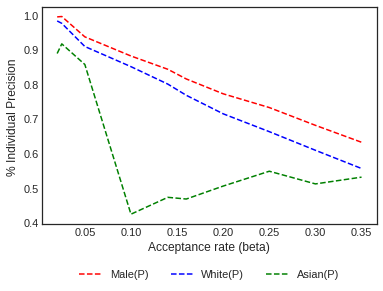

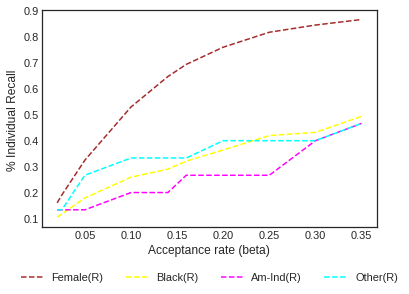

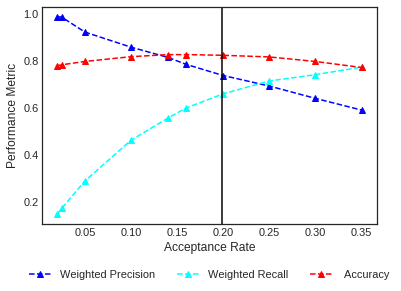

In [63]:
#2FIG-->practice
#beta (.1 to .2 for adult case)
prec=[[0.9945652173913043, 0.8620689655172413, 0.9828326180257511, 0.7083333333333334, 0.8888888888888888, 0.6666666666666666, 1.0],
[0.9956521739130435, 0.8240740740740741, 0.9759450171821306, 0.6333333333333333, 0.9166666666666666, 0.6666666666666666, 1.0],
[0.9369565217391305, 0.7004608294930875, 0.9090909090909091, 0.47540983606557374, 0.8571428571428571, 0.2857142857142857, 0.8],
[0.8816503800217155, 0.5701149425287356, 0.8508997429305912, 0.3442622950819672, 0.425, 0.1875, 0.45454545454545453],
[0.843289371605896, 0.4975369458128079, 0.8004895960832313, 0.27647058823529413, 0.47368421052631576, 0.14285714285714285, 0.3125],
[0.8153428377460964, 0.46695402298850575, 0.7682012847965739, 0.26666666666666666, 0.46875, 0.16666666666666666, 0.2777777777777778],
[0.7725298588490771, 0.4087256027554535, 0.7147751605995717, 0.24180327868852458, 0.5061728395061729, 0.13333333333333333, 0.2608695652173913],
[0.7328410078192876, 0.3516988062442608, 0.6632408359027064, 0.22295081967213115, 0.5490196078431373, 0.10810810810810811, 0.21428571428571427],
[0.681505609844372, 0.30321592649310875, 0.6094775906365972, 0.1912568306010929, 0.512396694214876, 0.13333333333333333, 0.17647058823529413],
[0.6326403971455166, 0.2664041994750656, 0.5568876926841204, 0.1873536299765808, 0.5319148936170213, 0.1346153846153846, 0.175]]

rec=[[0.06545064377682404, 0.16025641025641027, 0.07773251866938222, 0.10493827160493827, 0.06349206349206349, 0.13333333333333333, 0.13333333333333333],
[0.08190271816881259, 0.19017094017094016, 0.09640190088255261, 0.11728395061728394, 0.0873015873015873, 0.13333333333333333, 0.13333333333333333],
[0.15414878397711015, 0.3247863247863248, 0.17990495587236932, 0.17901234567901234, 0.14285714285714285, 0.13333333333333333, 0.26666666666666666],
[0.290414878397711, 0.5299145299145299, 0.33706720977596744, 0.25925925925925924, 0.1349206349206349, 0.2, 0.3333333333333333],
[0.38876967095851217, 0.6474358974358975, 0.4439918533604888, 0.29012345679012347, 0.21428571428571427, 0.2, 0.3333333333333333],
[0.42954220314735336, 0.6944444444444444, 0.48710115410726407, 0.32098765432098764, 0.23809523809523808, 0.26666666666666666, 0.3333333333333333],
[0.5089413447782547, 0.7606837606837606, 0.56653088934148, 0.36419753086419754, 0.3253968253968254, 0.26666666666666666, 0.4],
[0.6033619456366237, 0.8183760683760684, 0.6571622539035981, 0.41975308641975306, 0.4444444444444444, 0.26666666666666666, 0.4],
[0.6734620886981402, 0.8461538461538461, 0.7247114731839783, 0.43209876543209874, 0.49206349206349204, 0.4, 0.4],
[0.7292560801144492, 0.8675213675213675, 0.7725729803122878, 0.49382716049382713, 0.5952380952380952, 0.4666666666666667, 0.4666666666666667]]

accu=[ 0.7774,0.7813,0.7954,0.8157,0.82442,0.8245,0.8216,0.8146,0.7954,0.7699]


import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,2,4]
r=[1,3,5,6]
#print(np.transpose(acc_rate))

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(10):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        #acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu)

'''
weighted_precision=
weighted_recall=
accu=
'''
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
beta=[.02,.025,.05,.1,.14,.16,.2,.25,.3,.35]
a=[prec[i][0] for i in range(10)]  
#b=[rec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(10)]  
#d=[rec[i][3] for i in range(6)]   
e=[prec[i][4] for i in range(10)]  
#f=[rec[i][5] for i in range(6)]   
#g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,a,label='Male(P)',color='red',linestyle='--') 
 
ax.plot(beta,c,label='White(P)',color='blue',linestyle='--') 

ax.plot(beta,e,label='Asian(P)',color='green',linestyle='--') 


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

#a=[prec[i][0] for i in range(6)]  
b=[rec[i][1] for i in range(10)]  
#c=[prec[i][2] for i in range(6)]  
d=[rec[i][3] for i in range(10)]   
#e=[prec[i][4] for i in range(6)]  
f=[rec[i][5] for i in range(10)]   
g=[rec[i][6] for i in range(10)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(beta,b,label='Female(R)',color='brown',linestyle='--')  
ax.plot(beta,d,label='Black(R)',color='yellow',linestyle='--')
ax.plot(beta,f,label='Am-Ind(R)',color='magenta',linestyle='--')
ax.plot(beta,g,label='Other(R)',color='cyan',linestyle='--')


   
plt.title('')
ax.set_xlabel('Acceptance rate (beta)')
ax.set_ylabel('% Individual Recall ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 


#This is the above results with DP variations
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)


ax.plot(beta,weighted_precision,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(beta,weighted_recall,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(beta,accu,label=' Accuracy',color='red',marker='^',linestyle='--')
#ax.vlines(y=[.1992], ymin=[0], ymax=[1], colors='purple', linestyles='--', lw=2, label='PRedict avg. acc.')
plt.axvline(.1992, color='black', linestyle='solid')

   
plt.title('')
ax.set_xlabel('Acceptance Rate')
ax.set_ylabel('Performance Metric') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 






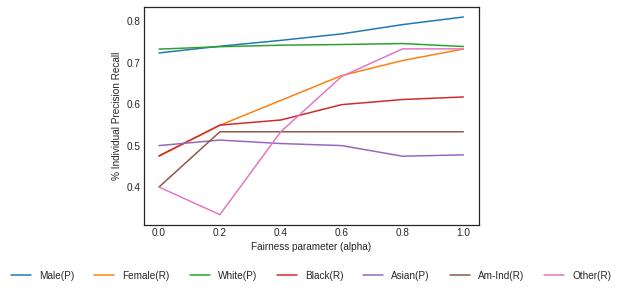

In [48]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

a=[prec[i][0] for i in range(6)]  
b=[rec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(6)]  
d=[rec[i][3] for i in range(6)]   
e=[prec[i][4] for i in range(6)]  
f=[rec[i][5] for i in range(6)]   
g=[rec[i][6] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='Male(P)') 
ax.plot(alpha,b,label='Female(R)')  
ax.plot(alpha,c,label='White(P)') 
ax.plot(alpha,d,label='Black(R)')
ax.plot(alpha,e,label='Asian(P)') 
ax.plot(alpha,f,label='Am-Ind(R)')
ax.plot(alpha,g,label='Other(R)')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Individual Precision Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

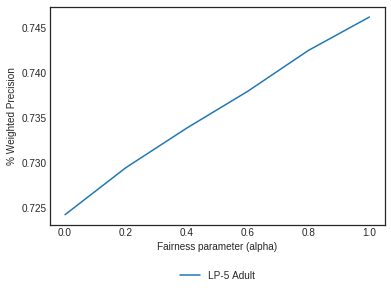

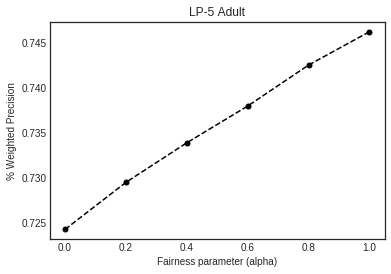

In [49]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

a=[weight_prec[i] for i in range(6)]  



'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='LP-5 Adult') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Weighted Precision') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Weighted Precision')
plt.title('LP-5 Adult')
plt.plot(alpha, a,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a3.png') 

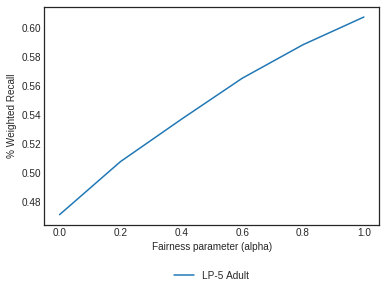

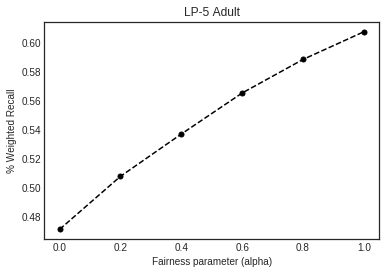

In [50]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

 
b=[weight_rec[i] for i in range(6)]  



'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,b,label='LP-5 Adult')  




   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Weighted Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Weighted Recall')
plt.title('LP-5 Adult')
plt.plot(alpha, b,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a4.png') 

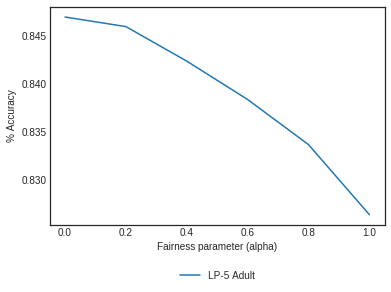

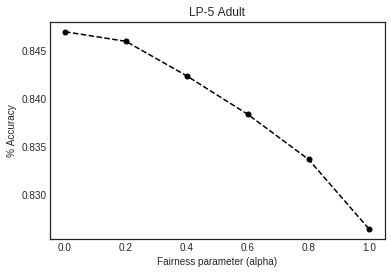

In [51]:
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='LP-5 Adult') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Accuracy')
plt.title('LP-5 Adult')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

In [50]:
#padala 
    
    prec1=[
[0.6452, 0.7561, 0.7567, 0.2777, 0.7553, 0.6089, 0.5],
[0.6442, 0.7717, 0.7675, 0.3478, 0.7349, 0.5885, 0.6153],
[0.5703, 0.8180, 0.75, 0.4, 0.8135, 0.5930, 0.5454],
[0.6020, 0.9199, 0.7874, 0.1428, 0.9117, 0.6886, 0.5]]
    
prec=np.zeros((4,7),dtype=float)
to=[1,0,2,5,4,3,6]
k=0
for i in range(7):
    for j in range(4):
        prec[j][i]=prec1[j][to[k]]
    k=k+1    
import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
p=[0,1,2,3,4,5,6]
r=[]
#print(np.transpose(acc_rate))

dp_list=[]
sizes=[9211, 4356, 11678,1220, 404, 150,115]
for i in range(4):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(7):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        #acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    wp=weight_prec/weight_p
    #wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu)

[0.7281943355200116, 0.7376327854352472, 0.735319517947962, 0.7952423859364635] [0.6579978770758432, 0.6579978770758432, 0.6579978770758432, 0.6579978770758432] [0.8157, 0.8218, 0.8244, 0.8245, 0.8233, 0.8216]


['a', 'b', ',', 'c', 'd', ',', 'e']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

